In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('/home/mehdi/github/LSSutils')
from lssutils.dataviz import setup_color
import nbodykit.lab as nb

In [2]:
setup_color()

In [8]:
cap = 'NGC'

def make_resplot(cap, output):
    

    pk_th = np.loadtxt(f'/home/mehdi/data/eboss/theory/eBOSS_QSO_{cap}_nnknown_512_cont_nnknown_512_kmin1_kmax64_fNL0.dat')
    pk_obs = nb.ConvolvedFFTPower.load(f'/home/mehdi/data/eboss/data/v7_2/3.0/measurements/spectra/spectra_{cap}_known_mainhighz_512_v7_2_main.json')
    covpks_all = np.load('./covpk_ezmocks_ngcsgc_v1.0.npz', allow_pickle=True)
    covpks = covpks_all[f'{cap}_null_standard_512'].item()    
    pk_err = np.sqrt(np.diagonal(covpks['covp0']))


    k_obs = pk_obs.poles['k']
    pk_obs = pk_obs.poles['power_0'].real-pk_obs.attrs['shotnoise']
    k_th = pk_th[:, 0]
    pk_th = pk_th[:, 1]

    is_good = (k_obs >= k_th.min()-1.0e-3) & (k_obs <= k_th.max()+1.0e-3)

    assert is_good.sum() == k_th.size
    assert abs(k_obs[is_good]-k_th).max() < 1.0e-4

    plt.plot(k_obs[is_good], pk_obs[is_good]-pk_th, 
             marker='.', ls='None', mfc='w', label=fr'DR16 {cap}')
    plt.fill_between(k_obs[is_good], -pk_err[is_good], pk_err[is_good], alpha=0.05, label=r'$1\sigma$ Mocks')

    plt.xscale('log')
    plt.legend()
    plt.xlabel(r'k $[h/Mpc]$')
    plt.ylabel(r'$\Delta P_{0}~[Mpc/h]^{3}$')
    
    plt.savefig(output, dpi=300, bbox_inches='tight')

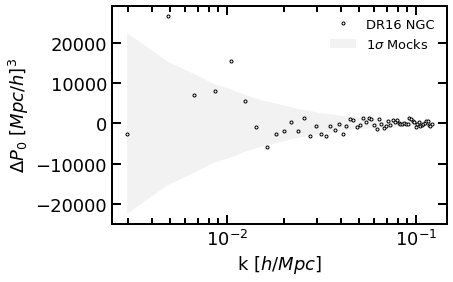

In [9]:
make_resplot('NGC', './primordial_features/dp0_ngc.png')

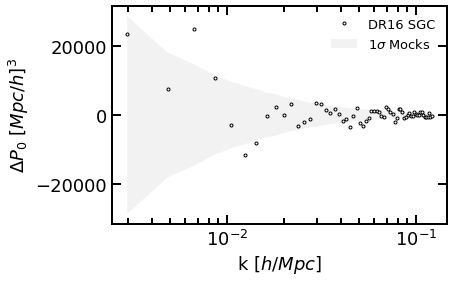

In [10]:
make_resplot('SGC', './primordial_features/dp0_sgc.png')

In [41]:
cap = 'NGC'

def make_resplot(cap, output):
    

    pk_th = np.loadtxt(f'/home/mehdi/data/eboss/theory/eBOSS_QSO_{cap}_nnknown_512_cont_nnknown_512_kmin1_kmax64_fNL0.dat')
    pk_obs = nb.ConvolvedFFTPower.load(f'/home/mehdi/data/eboss/data/v7_2/3.0/measurements/spectra/spectra_{cap}_known_mainhighz_512_v7_2_main.json')
    covpks_all = np.load('../covpk_ezmocks_ngcsgc_v1.0.npz', allow_pickle=True)
    covpks = covpks_all[f'{cap}_null_standard_512'].item()    
    pk_err = np.sqrt(np.diagonal(covpks['covp0']))


    k_obs = pk_obs.poles['k']
    pk_obs = pk_obs.poles['power_0'].real-pk_obs.attrs['shotnoise']
    k_th = pk_th[:, 0]
    pk_th = pk_th[:, 1]

    is_good = (k_obs >= k_th.min()-1.0e-3) & (k_obs <= k_th.max()+1.0e-3)

    assert is_good.sum() == k_th.size
    assert abs(k_obs[is_good]-k_th).max() < 1.0e-4

    plt.errorbar(k_obs[is_good], pk_obs[is_good]-pk_th, pk_err[is_good], capsize=3,
             marker='.', ls='None', mfc='w', label=fr'DR16 {cap}')
    #plt.fill_between(k_obs[is_good], -pk_err[is_good], pk_err[is_good], alpha=0.05, label=r'$1\sigma$ Mocks')
    plt.axhline(0.0, ls='-', color='r', alpha=0.3, lw=1)
    plt.xscale('log')
    plt.legend()
    plt.xlabel(r'k $[h/Mpc]$')
    plt.ylabel(r'$\Delta P_{0}~[Mpc/h]^{3}$')
    plt.ylim(-3.1e4, 5.8e4)
    plt.savefig(output, dpi=300, bbox_inches='tight')

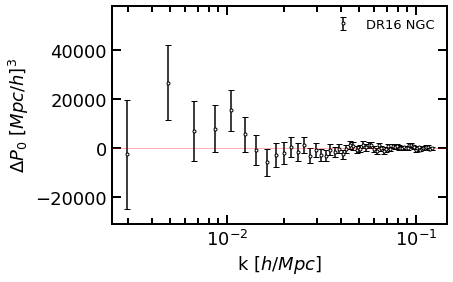

In [42]:
make_resplot('NGC', './dp0_ngc.png')

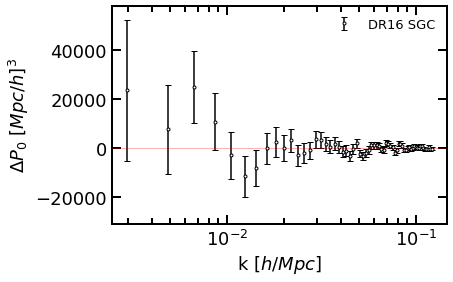

In [43]:
make_resplot('SGC', './dp0_sgc.png')

In [64]:
cap = 'NGC'

def make_resplot(cap, output):
    

    pk_th = np.loadtxt(f'/home/mehdi/data/eboss/theory/eBOSS_QSO_{cap}_nnknown_512_cont_nnknown_512_kmin1_kmax64_fNL0.dat')
    pk_obs = nb.ConvolvedFFTPower.load(f'/home/mehdi/data/eboss/data/v7_2/3.0/measurements/spectra/spectra_{cap}_known_mainhighz_512_v7_2_main.json')
    covpks_all = np.load('../covpk_ezmocks_ngcsgc_v1.0.npz', allow_pickle=True)
    covpks = covpks_all[f'{cap}_null_standard_512'].item()    
    pk_err = np.sqrt(np.diagonal(covpks['covp0']))


    k_obs = pk_obs.poles['k']
    pk_obs = pk_obs.poles['power_0'].real-pk_obs.attrs['shotnoise']
    k_th = pk_th[:, 0]
    pk_th = pk_th[:, 1]

    is_good = (k_obs >= k_th.min()-1.0e-3) & (k_obs <= k_th.max()+1.0e-3)

    assert is_good.sum() == k_th.size
    assert abs(k_obs[is_good]-k_th).max() < 1.0e-4

    plt.figure()
    #print(pk_th)
    plt.errorbar(k_obs[is_good], pk_obs[is_good]/pk_th-1, pk_err[is_good]/pk_th, capsize=3,
             marker='.', ls='None', mfc='w', label=fr'DR16 {cap}')
    #plt.fill_between(k_obs[is_good], -pk_err[is_good], pk_err[is_good], alpha=0.05, label=r'$1\sigma$ Mocks')
    plt.axhline(0.0, ls='-', color='r', alpha=0.3, lw=1)
    plt.xscale('log')
    plt.legend()
    plt.xlabel(r'k $[h/Mpc]$')
    plt.ylabel(r'$\Delta P_{0}/P_{0}$')
    plt.ylim(-2.5, 5.5)
    plt.savefig(output, dpi=300, bbox_inches='tight')

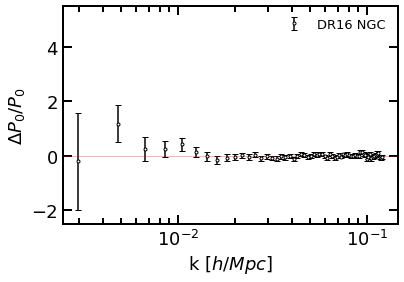

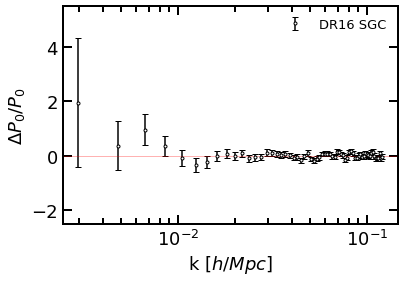

In [65]:
for cap in ['NGC', 'SGC']:
    make_resplot(cap, f'dp0_{cap}.png')

In [35]:
def write_p2txt(cap):
    
    pk_obs_ = nb.ConvolvedFFTPower.load(f'/home/mehdi/data/eboss/data/v7_2/3.0/measurements/spectra/spectra_{cap}_known_mainhighz_512_v7_2_main.json')
    covpks_all = np.load('../covpk_ezmocks_ngcsgc_v1.0.npz', allow_pickle=True)
    covpks = covpks_all[f'{cap}_null_standard_512'].item()    

    k_obs = pk_obs_.poles['k']
    pk_obs = pk_obs_.poles['power_0'].real-pk_obs_.attrs['shotnoise']
    np.savetxt(f'kp0_{cap}.txt', np.column_stack([k_obs, pk_obs]), header='k[h/Mpc] P0 [Mpc/h]**3')
    
    
def write_cov2txt(cap):
    covpks_all = np.load('../covpk_ezmocks_ngcsgc_v1.0.npz', allow_pickle=True)
    covpks = covpks_all[f'{cap}_null_standard_512'].item()    
    np.savetxt(f'cov_{cap}.txt', covpks['covp0'])
        

In [59]:
write_p2txt('SGC')
write_cov2txt('SGC')